.apply(def) - применить функцию к столбцу

.mul() - умножение 

.value_counts(True) - выдаст сразу метрику


In [138]:
name = 'Alex Yann, Liza Sorochik, Artem Popov, Timur Akhmatshin, Vova Chukavin'
name = name.split(',') 
name

['Alex Yann',
 ' Liza Sorochik',
 ' Artem Popov',
 ' Timur Akhmatshin',
 ' Vova Chukavin']

In [38]:
import pandas as pd

In [40]:
df = pd.read_csv('/content/companies.csv', sep =';')
df1 = pd.read_csv('/content/taxi_peru.csv', sep = ';')


In [ ]:
df = pd.DataFrame({
    'client_id' : [1, 10,12,43,100],
    'sex': [1,1,1,0,0],
    'wealth': ['medium','high','low','medium','high'],
    'age':[12,43,56,23,30]
})
df

,client_id,sex,wealth,age
0,1,1,medium,36
1,10,1,high,43
2,12,1,low,56
3,43,0,medium,23
4,100,0,high,30


In [ ]:
df = df.query('wealth == "medium"')\
  .query('age > 35' )
df


,client_id,sex,wealth,age
0,1,1,medium,36


In [3]:
df = pd.DataFrame({
    'Клиент Id':[9002,6722,8799,8737,5208],
    'Пол': [1,1,1,0,0],
    'Состояние': ['medium','high','low','medium','high'],
    'Возраст':[12,43,56,23,30]
})

In [4]:
df.rename(columns = {
    'Клиент Id': 'client_id',
    'Пол':'sex',
    'Состояние' : 'wealth',
    'Возраст' : 'age'

}, inplace = True)

In [5]:
df['age_30']=df.age>30
df

,client_id,sex,wealth,age,age_30
0,9002,1,medium,12,False
1,6722,1,high,43,True
2,8799,1,low,56,True
3,8737,0,medium,23,False
4,5208,0,high,30,False


In [15]:
df['unique_num'] = df.nunique()
df


,client_id,sex,wealth,age,age_30,unique_num
0,9002,1,medium,12,False,NaN
1,6722,1,high,43,True,NaN
2,8799,1,low,56,True,NaN
3,8737,0,medium,23,False,NaN
4,5208,0,high,30,False,NaN


In [21]:
df['unique_num'] = pd.unique(df.age)
df

,client_id,sex,wealth,age,age_30,unique_num
0,9002,1,medium,12,False,12
1,6722,1,high,43,True,43
2,8799,1,low,56,True,56
3,8737,0,medium,23,False,23
4,5208,0,high,30,False,30


In [36]:
data = pd.DataFrame({
    'client_id':[9002,6722,8799,8737,5208],
    'amount': [42331,88420,1714,80572,57549],
    'date':[1585425830,1585429536,1585427761,1585427077,1585426290]
})
data.merge(df,'right')

,client_id,amount,date,sex,wealth,age,age_30,unique_num
0,9002,42331,1585425830,1,medium,12,False,12
1,6722,88420,1585429536,1,high,43,True,43
2,8799,1714,1585427761,1,low,56,True,56
3,8737,80572,1585427077,0,medium,23,False,23
4,5208,57549,1585426290,0,high,30,False,30


In [62]:
def read_n_agg(path):
  data=pd.read_csv(path , sep = ';')
  res = data.groupby('company', as_index = False)\
      .agg({'income':'mean'})
  return res
  

In [63]:
a='/content/companies.csv'
read_n_agg(a)

,company,income
0,En +,9.962187e+10
1,"АО «Александрова, Савельев и Мельникова»",7.206782e+10
2,АО «Андреев-Анисимов»,6.931948e+09
3,АО «Андреев-Макарова»,8.934380e+10
4,АО «Большаков Кошелева»,7.860861e+10
...,...,...
284,Щекиноазот,4.309092e+10
285,Щукин Лимитед,6.703036e+10
286,Эйвон Бьюти Продактс Компани (Avon),2.503657e+10
287,Яковлева Инкорпорэйтед,3.523436e+10


In [72]:
taxi = pd.read_csv('/content/taxi_peru.csv', sep = ';', parse_dates = ['start_at', 'end_at', 'arrived_at'])
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


In [90]:
taxi_source=taxi.groupby('source', as_index = False)\
    .agg({'start_type':'count'})
taxi_source

,source,start_type
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


In [92]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [75]:
taxi.agg({'start_type':'count'})

start_type    23111
dtype: int64

In [87]:
(taxi_source['start_type']/23111)*100

source
Android    21.240968
Wap         0.588464
iPad        2.470685
iPhone     42.148760
web        33.018909
Name: start_type, dtype: float64

In [96]:
(taxi.source.value_counts(True)*100).idxmax()

'iPhone'

In [123]:
score = taxi.driver_score.value_counts(True).mul(100).round(2).reset_index().rename(columns = {'index':'driver_score',
                                                                                    'driver_score':'percentage'})
score = pd.DataFrame(score)
score

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

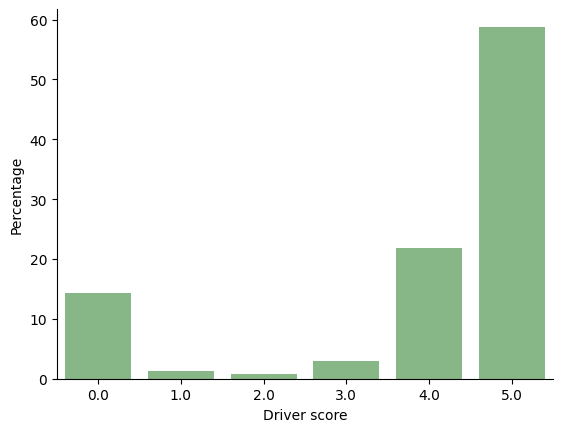

In [126]:
ax = sns.barplot(x=score.driver_score, y=score.percentage, data=score, color='green', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [135]:
score_client = taxi.rider_score.value_counts(True).mul(100).round(2).reset_index().rename(columns={'index':'mark', 'rider_score':'percentage'})
score_client

,mark,percentage
0,5.0,87.10
1,4.0,8.83
2,0.0,2.29
3,3.0,1.38
4,1.0,0.21
5,2.0,0.19


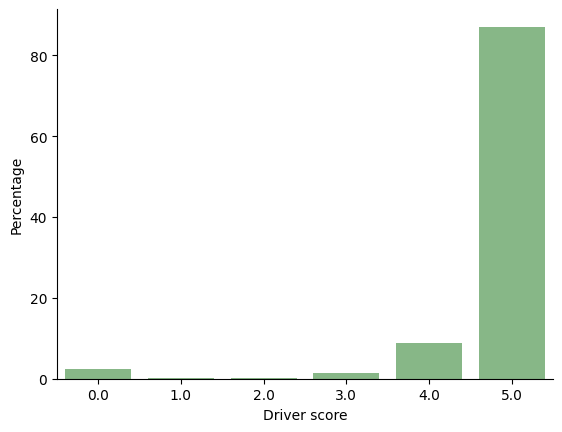

In [137]:
ax = sns.barplot(x=score_client.mark, y=score_client.percentage, data=score_client, color='green', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()